<a href="https://colab.research.google.com/github/waterlemon7z/Python-for-Finance/blob/main/Python_for_Finance_Chap_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/yhilpisch/py4fi2nd/refs/heads/master/source/tr_eikon_eod_data.csv

--2025-01-10 11:01:20--  https://raw.githubusercontent.com/yhilpisch/py4fi2nd/refs/heads/master/source/tr_eikon_eod_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209046 (204K) [text/plain]
Saving to: ‘tr_eikon_eod_data.csv’

tr_eikon_eod_data.c 100%[===================>] 204.15K  --.-KB/s    in 0.03s   

2025-01-10 11:01:20 (5.81 MB/s) - ‘tr_eikon_eod_data.csv’ saved [209046/209046]



In [ ]:
filename = 'tr_eikon_eod_data.csv'

f = open(filename, 'r')
f.readlines()[:5]
data = pd.read_csv(filename, index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

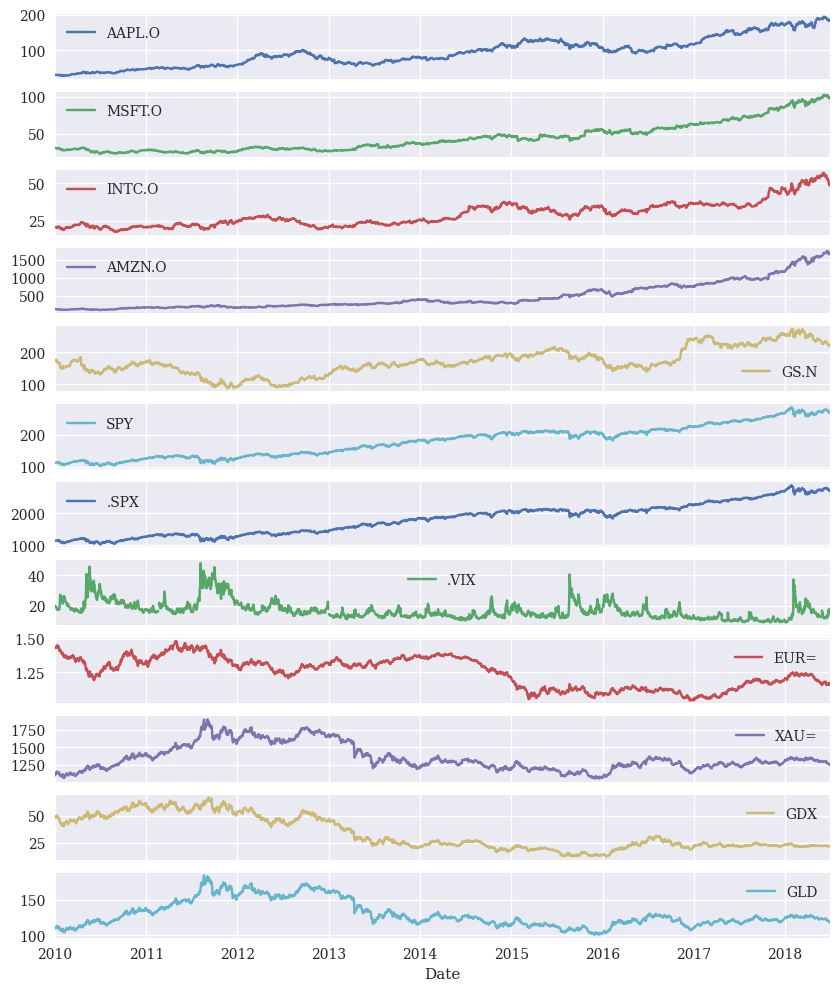

In [ ]:
data.head()
data.tail()
data.plot(figsize=(10,12), subplots=True)

In [ ]:
instruments = ['Apple stock', 'Microsoft Stock', 'Intel Stock','Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Stock','S&P 500 Index',
               'VIX Volatility Index','EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Stock
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [ ]:
data.info()
data.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [ ]:
data.mean()
data.aggregate([min, np.mean, np.std, np.median, max])

<ipython-input-17-cb913368f873>:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.aggregate([min, np.mean, np.std, np.median, max])
<ipython-input-17-cb913368f873>:2: FutureWarning: The provided callable <function mean at 0x7ec22b1f95a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.aggregate([min, np.mean, np.std, np.median, max])
<ipython-input-17-cb913368f873>:2: FutureWarning: The provided callable <function std at 0x7ec22b1f96c0> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  data.aggregate([min, np.mean, np.std, np.median, max])
<ipython-input-17-cb913368f873>

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.360000,12.470000,100.50000
mean,93.455973,44.561115,29.364192,480.461251,170.216221,180.323029,1802.713106,17.027133,1.248587,1349.014130,33.566525,130.08659
std,40.551559,19.527712,8.172160,372.307818,42.483935,48.190071,483.337146,5.883428,0.113711,188.745856,15.169564,18.78359
median,90.550624,39.660000,27.330000,322.065000,164.430000,186.320000,1863.080000,15.585000,1.270250,1292.610000,25.625000,124.00500
max,193.980000,102.490000,57.080000,1750.080000,273.380000,286.580000,2872.870000,48.000000,1.482600,1898.990000,66.630000,184.59000


In [ ]:
data.diff().head()
data.diff().mean()

,0
AAPL.O,0.064737
MSFT.O,0.031246
INTC.O,0.013540
AMZN.O,0.706608
GS.N,0.028224
SPY,0.072103
.SPX,0.732659
.VIX,-0.019583
EUR=,-0.000119
XAU=,0.041887


<ipython-input-23-046c1d438a68>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data.pct_change().round(3).head()
<ipython-input-23-046c1d438a68>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data.pct_change().mean().plot(kind='bar', figsize=(10,6))


<Axes: >

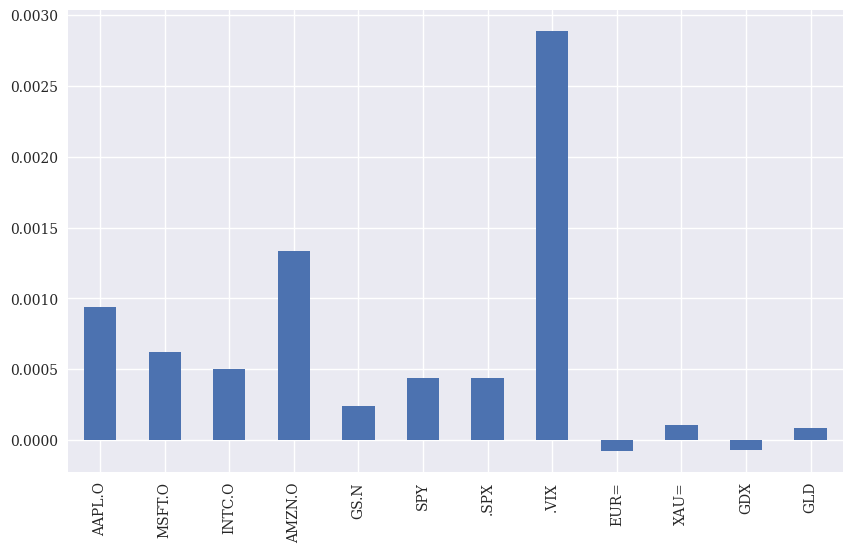

In [ ]:
data.pct_change().round(3).head()
data.pct_change().mean().plot(kind='bar', figsize=(10,6))

<Axes: xlabel='Date'>

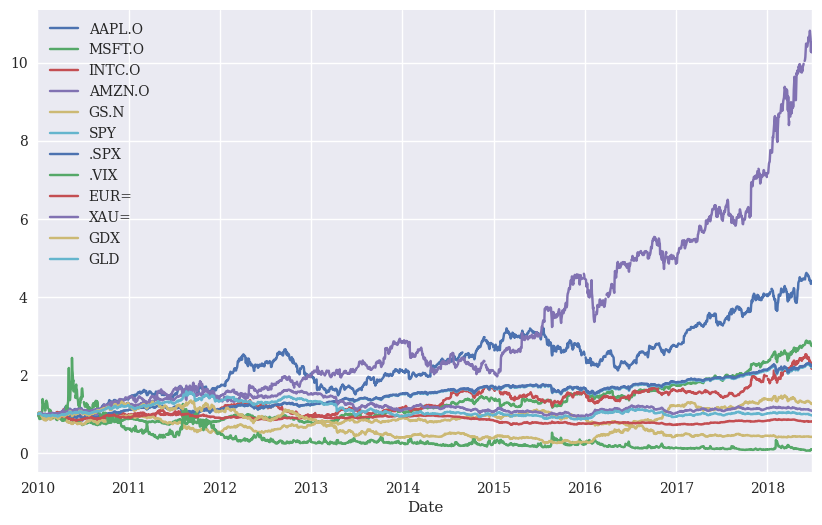

In [ ]:
rets = np.log(data/ data.shift(1))
rets.head().round(3)
rets.cumsum().apply(np.exp).plot(figsize=(10,6))

<ipython-input-31-a3a65aad9715>:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data.resample('1w', label='right').last().head()
<ipython-input-31-a3a65aad9715>:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))


<Axes: xlabel='Date'>

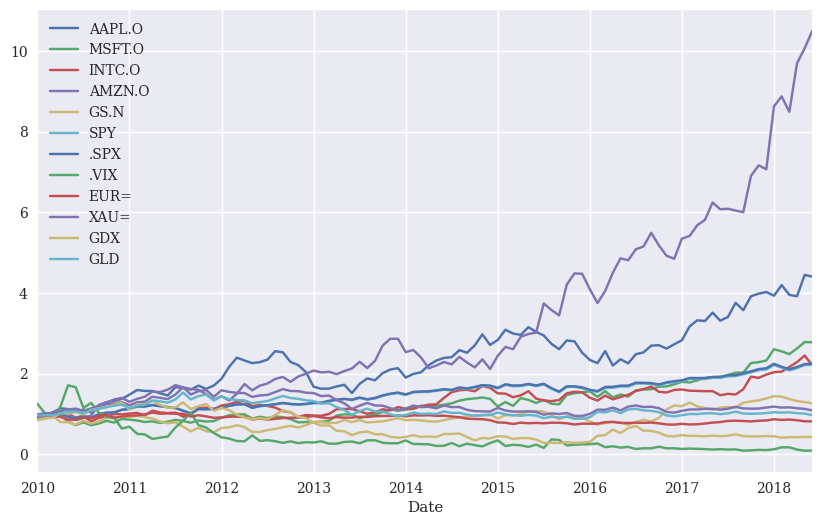

In [ ]:
data.resample('1w', label='right').last().head()
data.resample('1d', label='right').last().head()
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))
# 예측 편향 피하기 => pandas는 보통 left 값을 데하는데, 금융공학적으로 일관성을 가지려면 구간의 오른쪽 인덱스값을 챙겨야함

<Axes: xlabel='Date'>

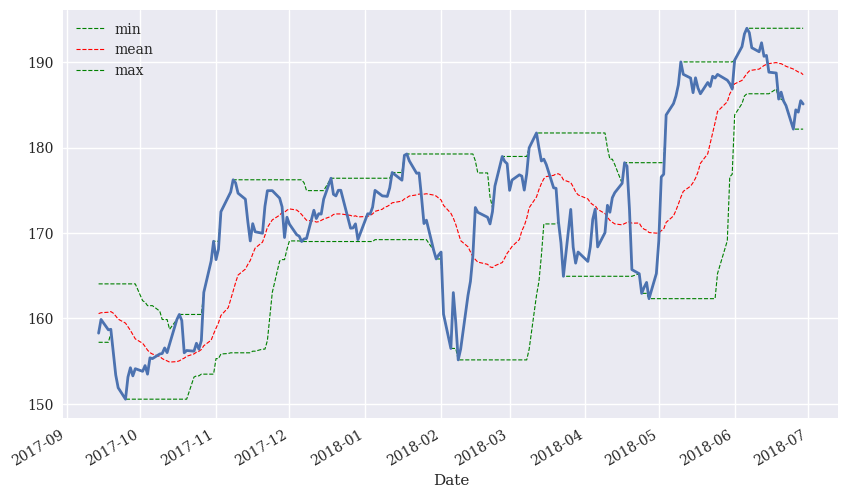

In [ ]:
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

window = 20
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
data.dropna().head()

ax = data[['min','mean','max']].iloc[-200:].plot(
    figsize=(10,6 ),style=['g--', 'r--','g--'], lw=0.8
)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)

<Axes: xlabel='Date'>

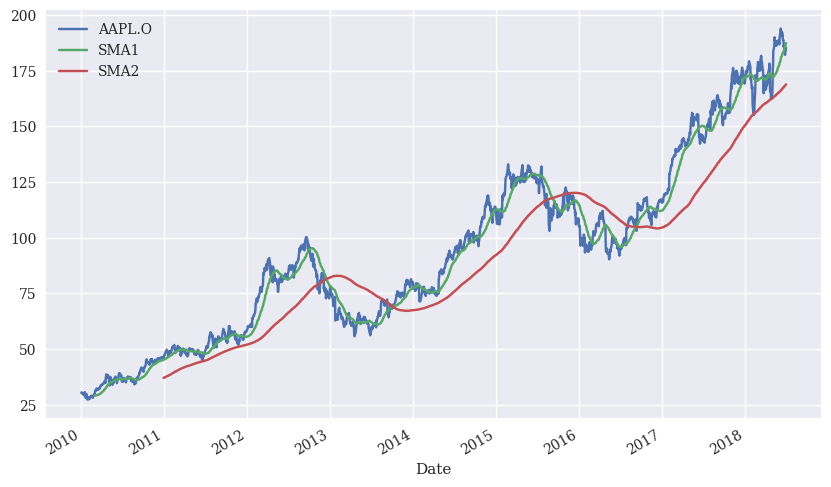

In [ ]:
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()
data[[sym, 'SMA1', 'SMA2']].tail()

data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

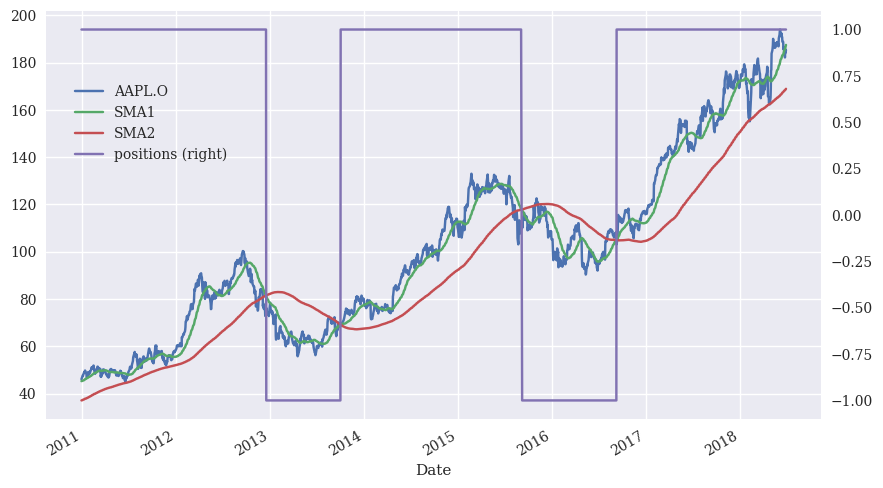

In [ ]:
data.dropna(inplace=True)

data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10,6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## 상관관계 분석

In [4]:
!wget https://raw.githubusercontent.com/yhilpisch/py4fi2nd/refs/heads/master/source/tr_eikon_eod_data.csv

--2025-01-11 01:28:56--  https://raw.githubusercontent.com/yhilpisch/py4fi2nd/refs/heads/master/source/tr_eikon_eod_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209046 (204K) [text/plain]
Saving to: ‘tr_eikon_eod_data.csv’

tr_eikon_eod_data.c 100%[===================>] 204.15K  --.-KB/s    in 0.03s   

2025-01-11 01:28:56 (5.74 MB/s) - ‘tr_eikon_eod_data.csv’ saved [209046/209046]



array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

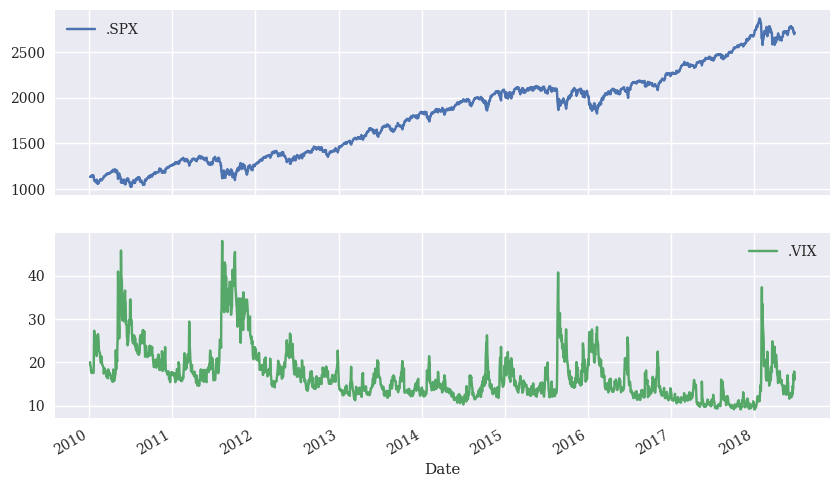

In [6]:
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

data= raw[['.SPX', '.VIX']].dropna()

data.tail()
data.plot(subplots=True, figsize=(10,6))

<Axes: xlabel='Date'>

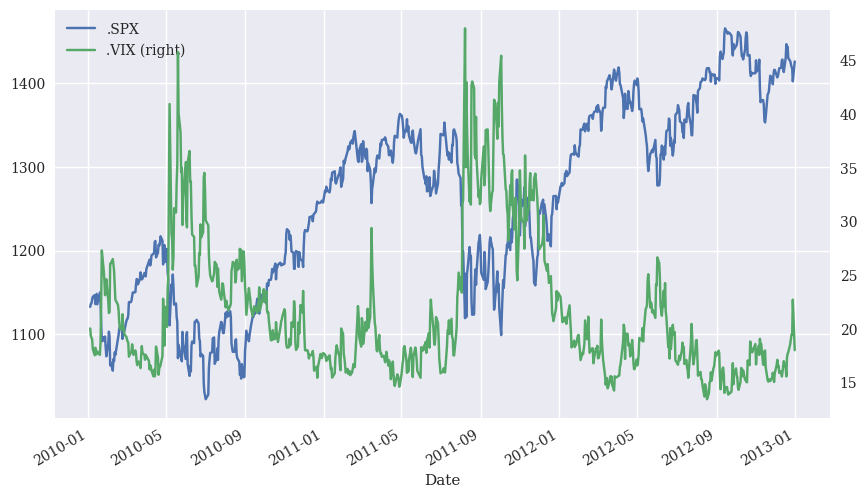

In [7]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10,6))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

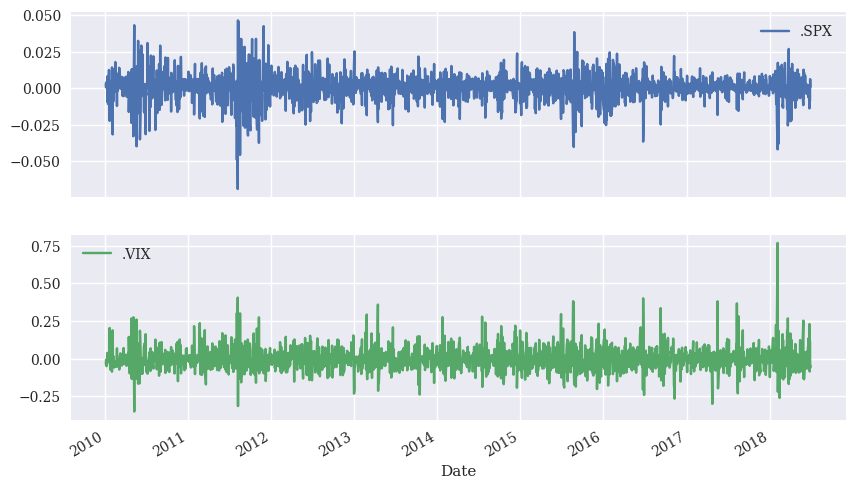

In [10]:
rets = np.log(data / data.shift(1))
rets.head()
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10,6))

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

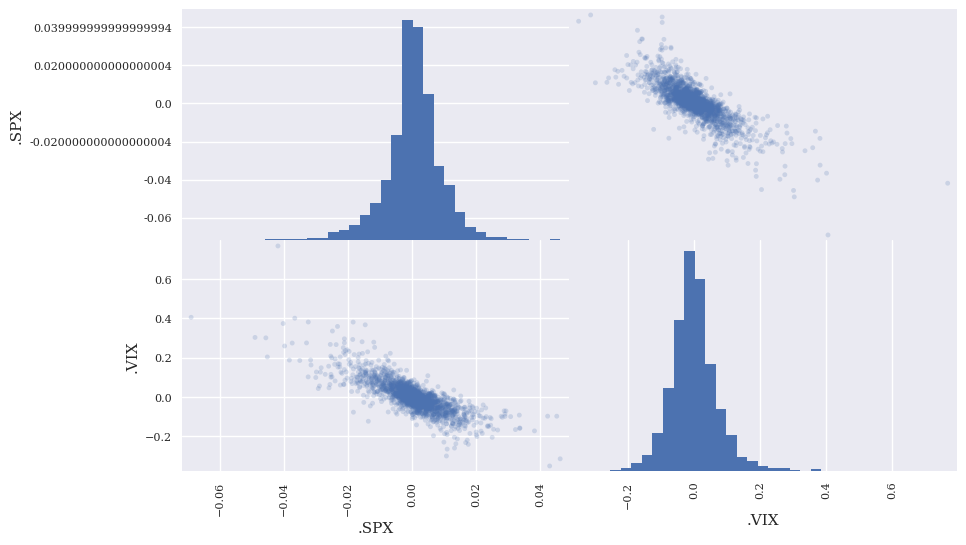

In [11]:
pd.plotting.scatter_matrix(rets,
                           alpha=.2,
                           diagonal='hist',
                           hist_kwds={'bins':35},
                           figsize=(10,6))

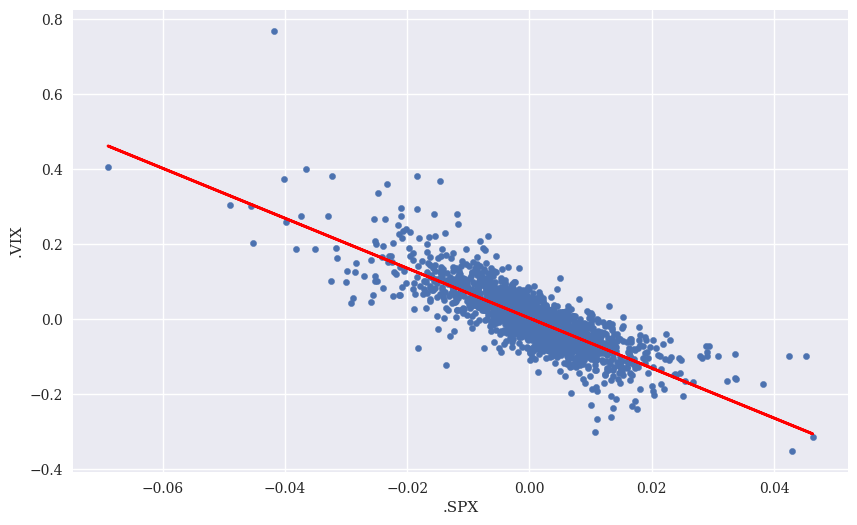

In [12]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)

ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10,6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)

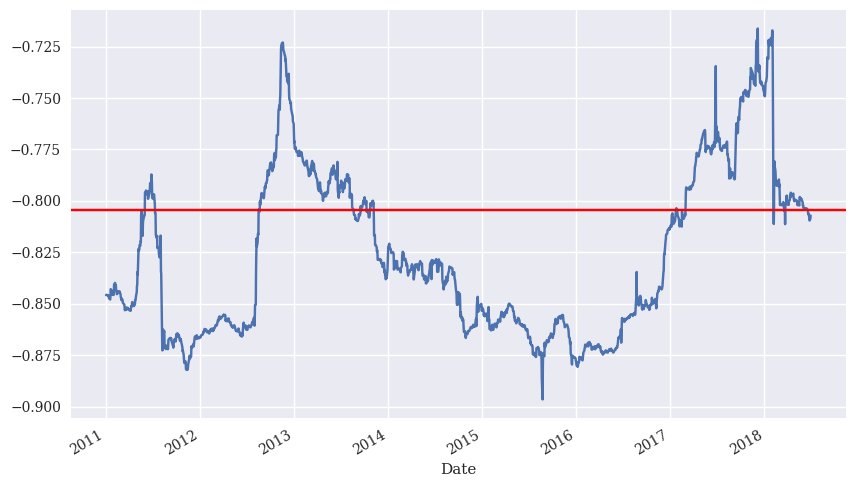

In [15]:
rets.corr()
ax = rets['.SPX'].rolling(window=252).corr(
    rets['.VIX']
).plot(figsize=(10,6))
ax.axhline(rets.corr().iloc[0,1], c = 'r')

## 고빈도 데이터

In [16]:
!wget https://raw.githubusercontent.com/yhilpisch/py4fi2nd/refs/heads/master/source/fxcm_eur_usd_tick_data.csv

--2025-01-11 02:40:30--  https://raw.githubusercontent.com/yhilpisch/py4fi2nd/refs/heads/master/source/fxcm_eur_usd_tick_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20459972 (20M) [text/plain]
Saving to: ‘fxcm_eur_usd_tick_data.csv’

fxcm_eur_usd_tick_d 100%[===================>]  19.51M  38.9MB/s    in 0.5s    

2025-01-11 02:40:31 (38.9 MB/s) - ‘fxcm_eur_usd_tick_data.csv’ saved [20459972/20459972]



In [22]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('fxcm_eur_usd_tick_data.csv', index_col=0, parse_dates=True)
tick.head()
tick.info()
tick['Mid'] = tick.mean(axis=1)
tick['Mid'].plot(figsize=(10,6))

,Bid,Ask,Mid
2018-06-29 00:00:00.082,1.15635,1.15636,1.156355
2018-06-29 00:00:00.106,1.15634,1.15636,1.156350
2018-06-29 00:00:00.114,1.15634,1.15635,1.156345
2018-06-29 00:00:00.121,1.15634,1.15634,1.156340
2018-06-29 00:00:00.151,1.15632,1.15634,1.156330


<Axes: >

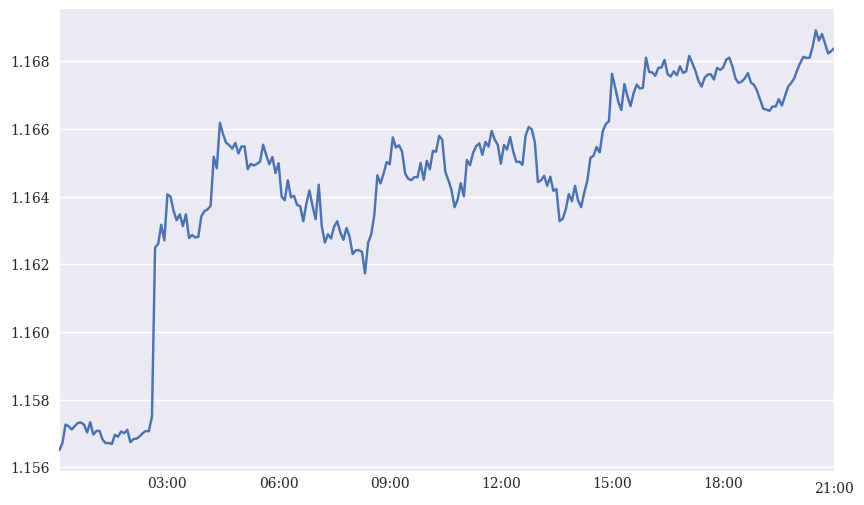

In [24]:
#리셈플링
tick_resam = tick.resample(rule='5min', label='right').last()
tick_resam.head()

tick_resam['Mid'].plot(figsize=(10,6))